In [1]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
prefAttachment = []
erdos_renyi = []

for i in range(25, number_of_nodes):

    X.append((2 + 2*i)/(i + 2))

    numInfected1 = percolation.calculateFinalInfectionPrefAttach(1, [[0,1], [1,0]], [0,1], 2, i, 100, 0.9, 0.1)
    prefAttachment.append(numInfected1)

    numInfected2 = percolation.calculateFinalInfectionErdosReyni(1, i + 2, 2*i + 2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    


plt.plot(X, prefAttachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Average Node Degrees')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')




KeyboardInterrupt: 

In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
prefAttachment = []
erdos_renyi = []

for i in range(1, number_of_nodes):

    X.append(i + 2)

    X.append((2 + 2*i)/(i + 2))

    numInfected1 = percolation.calculateFinalInfectionPrefAttach(1, [[0,1], [1,0]], [0,1], 2, i, 100,  0.9, 0.1)
    prefAttachment.append(numInfected1)

    numInfected2 = percolation.calculateFinalInfectionErdosReyni(1, i + 2, 2*i + 2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    

plt.plot(X, prefAttachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')

In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []

for numEdge in range(300, 700, 50):
    probabilities = np.arange(0, 1.1, 0.1)
    for perc_prob in probabilities:
            X.append(perc_prob)
            Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, numEdge, 100, perc_prob))
plt.scatter(X, Y, label = 'Number of edges:' + str(numEdge))
plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100')
plt.legend()


In [ ]:
import graphs
import percolation
import random
import numpy as np
import marko
import matplotlib.pyplot as plt

X = []
Y = []
probabilities = np.arange(0, 1.01, 0.02)

for perc_prob in probabilities:
    X.append(perc_prob)
    Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
plt.plot(X, Y, label = 'Percolation')

X = []
Y = []
for perc_prob in probabilities:
    X.append(perc_prob)
    Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
plt.plot(X, Y, label = 'Markovian SIR')

plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100; Number of edges:500')
plt.legend()


In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

transmission_rates = np.arange(0, 1.1, 0.2)
recovery_rates = np.arange(0, 1.1, 0.2)
for beta in transmission_rates:
    X = []
    Y = []
    for rho in recovery_rates:
        perc_prob = beta / (beta + rho)
        X.append(perc_prob)
        Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
    plt.plot(X, Y, label = 'transmission rate: ' + str(beta))
plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100; Number of edges:500')
plt.legend()


In [2]:
numTrials = 100

import signal
from contextlib import contextmanager
import configuration_model
import numpy as np

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)


print('Degree Distribution -- 1:0.5, 2:0.5')
print('Expected Giant Component Size: 0')
size = []
n = 500
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model2({1:1/2, 2:1/2}, n)
      #print (graph)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:0.9, 6:0.1')
print('Expected Giant Component Size: 206.4')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model2({1:9/10, 6:1/10}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:1/2, 3:1/2')
print('Expected Giant Component Size: 407.4')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model2({1:1/2, 3:1/2}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:1/4, 2:1/2, 3:1/4')
print('Expected Giant Component Size: 425.7')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model2({1:1/4, 2:1/2, 3:1/4}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))



Degree Distribution -- 1:0.5, 2:0.5
Expected Giant Component Size: 0
Configuration Model: 14.54
Degree Distribution -- 1:0.9, 6:0.1
Expected Giant Component Size: 206.4
Configuration Model: 207.14
Degree Distribution -- 1:1/2, 3:1/2
Expected Giant Component Size: 407.4
Configuration Model: 407.7
Degree Distribution -- 1:1/4, 2:1/2, 3:1/4
Expected Giant Component Size: 425.7
Configuration Model: 423.69


0.0
0.04
0.08
0.12
0.16
0.2
0.24
0.28
0.32
0.36
0.4
0.44
0.48
0.52
0.56
0.6
0.64
0.68
0.72
0.76
0.8
0.84
0.88
0.92
0.96
1.0


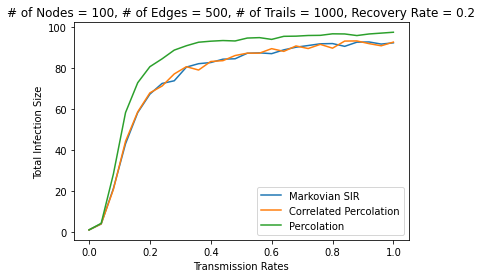

In [2]:
import correlated_percolation
import graphs
import markovian_SIR
import numpy as np
import random
import percolation
import matplotlib.pyplot as plt

class Node:
  def __init__(self, name, status, pred_inf_time, rec_time):
    self.name = name
    self.status = status
    self.pred_inf_time = pred_inf_time
    self.rec_time = rec_time

numOfNodes = 100
numOfEdges = 500
betas = np.arange(0, 1.01, 0.04)
recoveryRate = 0.2
numOfInfectedNodes = 1
Y1 = []
Y2 = []
Y3 = []

for transmissionRate in betas:
    SIR = []
    correlated = []
    normalPercolation = []
    for _ in range(1000):
        # random_graph = [[0,1], [1,2], [2,0], [0,2], [2,1], [1,0]]
        random_graph = graphs.erdos_renyi_graph(numOfNodes, numOfEdges)
        neighbors_per_node = markovian_SIR.tuples_to_dict(random_graph, numOfNodes)
        infection_source = random.sample([i for i in range(0, numOfNodes)], numOfInfectedNodes)

        # SIR
        nodes = []
        for name in neighbors_per_node:
            node = Node(name, None, None, None)
            nodes.append(node)
        infection = markovian_SIR.process_SIR_model(nodes, neighbors_per_node, transmissionRate, recoveryRate, infection_source, 1000)[-1][-1]
        SIR.append(infection)

        # CORRELATED 
        graph1 = correlated_percolation.percolation(random_graph, neighbors_per_node, transmissionRate, recoveryRate)
        neighbors_per_node2 = correlated_percolation.tuples_to_dict(graph1, numOfNodes)
        infected_nodes1 = correlated_percolation.find_entire_connection(infection_source, neighbors_per_node2)
        correlated.append(len(infected_nodes1))

        # PERCOLATION
        graph2 = percolation.percolation1(random_graph, transmissionRate, recoveryRate)
        infected_nodes2 = percolation.find_entire_connection(infection_source, graph2, numOfNodes)
       
        normalPercolation.append(len(infected_nodes2))
    print(transmissionRate)

    Y1.append(np.mean(SIR))
    Y2.append(np.mean(correlated))
    Y3.append(np.mean(normalPercolation))


plt.plot(betas, Y1, label="Markovian SIR")
plt.plot(betas, Y2, label="Correlated Percolation")
plt.plot(betas, Y3, label="Percolation")
plt.xlabel("Transmission Rates")
plt.ylabel("Total Infection Size")
plt.title("# of Nodes = 100, # of Edges = 500, # of Trails = 1000, Recovery Rate = 0.2")
plt.legend()

/Users/senemisik/Documents/GitHub/CURIS2021/markovian_SIR.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  inf_time = time + np.random.exponential(1/transmissionRate)
/Users/senemisik/Documents/GitHub/CURIS2021/correlated_percolation.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  transmissionTime = np.random.exponential(1/transmissionRate)
0.0
0.04
0.08
0.12
0.16
0.2
0.24
0.28
0.32
0.36
0.4
0.44
0.48
0.52
0.56
0.6
0.64
0.68
0.72
0.76
0.8
0.84
0.88
0.92
0.96
1.0


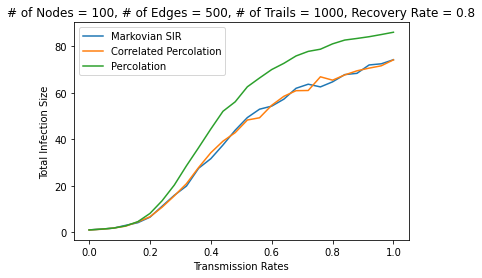

In [3]:
import correlated_percolation
import graphs
import markovian_SIR
import numpy as np
import random
import percolation
import matplotlib.pyplot as plt

class Node:
  def __init__(self, name, status, pred_inf_time, rec_time):
    self.name = name
    self.status = status
    self.pred_inf_time = pred_inf_time
    self.rec_time = rec_time

numOfNodes = 100
numOfEdges = 500
betas = np.arange(0, 1.01, 0.04)
recoveryRate = 0.8
numOfInfectedNodes = 1
Y1 = []
Y2 = []
Y3 = []

for transmissionRate in betas:
    SIR = []
    correlated = []
    normalPercolation = []
    for _ in range(1000):
        # random_graph = [[0,1], [1,2], [2,0], [0,2], [2,1], [1,0]]
        random_graph = graphs.erdos_renyi_graph(numOfNodes, numOfEdges)
        neighbors_per_node = markovian_SIR.tuples_to_dict(random_graph, numOfNodes)
        infection_source = random.sample([i for i in range(0, numOfNodes)], numOfInfectedNodes)

        # SIR
        nodes = []
        for name in neighbors_per_node:
            node = Node(name, None, None, None)
            nodes.append(node)
        infection = markovian_SIR.process_SIR_model(nodes, neighbors_per_node, transmissionRate, recoveryRate, infection_source, 1000)[-1][-1]
        SIR.append(infection)

        # CORRELATED 
        graph1 = correlated_percolation.percolation(random_graph, neighbors_per_node, transmissionRate, recoveryRate)
        neighbors_per_node2 = correlated_percolation.tuples_to_dict(graph1, numOfNodes)
        infected_nodes1 = correlated_percolation.find_entire_connection(infection_source, neighbors_per_node2)
        correlated.append(len(infected_nodes1))

        # PERCOLATION
        graph2 = percolation.percolation1(random_graph, transmissionRate, recoveryRate)
        infected_nodes2 = percolation.find_entire_connection(infection_source, graph2, numOfNodes)
       
        normalPercolation.append(len(infected_nodes2))
    print(transmissionRate)

    Y1.append(np.mean(SIR))
    Y2.append(np.mean(correlated))
    Y3.append(np.mean(normalPercolation))


plt.plot(betas, Y1, label="Markovian SIR")
plt.plot(betas, Y2, label="Correlated Percolation")
plt.plot(betas, Y3, label="Percolation")
plt.xlabel("Transmission Rates")
plt.ylabel("Total Infection Size")
plt.title("# of Nodes = 100, # of Edges = 500, # of Trails = 1000, Recovery Rate = 0.8")
plt.legend()

In [1]:
import graphs
print(graphs.triangle(4))

[[0, 1], [1, 0], [0, 2], [2, 0], [1, 2], [2, 1], [3, 4], [4, 3], [3, 5], [5, 3], [4, 5], [5, 4], [6, 7], [7, 6], [6, 8], [8, 6], [7, 8], [8, 7], [9, 10], [10, 9], [9, 11], [11, 9], [10, 11], [11, 10], [0, 3], [3, 0], [1, 9], [9, 1], [2, 6], [6, 2], [4, 7], [7, 4], [5, 10], [10, 5], [8, 11], [11, 8]]


In [29]:

import graphs
import percolation
import numpy as np
import correlated_percolation
import random
import matplotlib.pyplot as plt

transmissionRates = np.arange(0, 1.5, 0.02)
recoveryRate = 0.3
numOfInfectedNodes = 1
percolation_inf_nodes = []
correlated_percolation_inf_nodes = []
numOfTriangles = 500
trials = 400
for beta in transmissionRates:
    num_infected1 = []
    num_infected2 = []
    for _ in range(trials):
        graph = graphs.triangle(numOfTriangles)
        graph1 = percolation.percolation1(graph, beta, recoveryRate)
        source = random.sample([i for i in range(0, numOfTriangles * 3)], numOfInfectedNodes)
        infected_nodes1 = percolation.find_entire_connection(source, graph1, numOfTriangles * 3)
        num_infected1.append(len(infected_nodes1))
        
        neighbors_per_node = correlated_percolation.tuples_to_dict(graph, numOfTriangles * 3)
        graph2 = correlated_percolation.percolation(graph, neighbors_per_node, beta, recoveryRate)
        neighbors_per_node2 = correlated_percolation.tuples_to_dict(graph2, numOfTriangles * 3)
        infected_nodes2 = correlated_percolation.find_entire_connection(source, neighbors_per_node2)
        num_infected2.append(len(infected_nodes2))

    percolation_inf_nodes.append(np.mean(num_infected1))
    correlated_percolation_inf_nodes.append(np.mean(num_infected2))
    print(beta)

plt.plot(transmissionRates, percolation_inf_nodes, label="Percolation")
plt.plot(transmissionRates, correlated_percolation_inf_nodes, label="Correlated Percolation")

plt.xlabel("Transmission Rates")
plt.ylabel("Total Infection Size")
plt.title("# of Trinagles = " + str(numOfTriangles) + ", # of Trials = " + str(trials) + ", Recovery Rate = " + str(recoveryRate))
plt.legend()




0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78
0.8
0.8200000000000001
0.84
0.86
0.88
0.9
0.92
0.9400000000000001
0.96
0.98
1.0
1.02
1.04
1.06
1.08
1.1
1.12
1.1400000000000001
1.16
1.18
1.2
1.22
1.24
1.26
1.28
1.3
1.32
1.34


KeyboardInterrupt: 

In [1]:
import degree_distribution_matrix
import numpy as np 
import matplotlib.pyplot as plt

numOfNodes = 100
recoveryRate = 0.4

transmissionRates = np.arange(0, 1.1, 0.1)
x1 = []
y1 = []
for beta in transmissionRates:
    x, y = degree_distribution_matrix.degree_distribution_calculation2(numOfNodes, recoveryRate, beta, {0:0, 1:0.9, 2:0, 3:0, 4:0, 5:0, 6:0.1})
    x1.append(x)
    y1.append(y)

plt.plot(transmissionRates, x1, label="Percolation")
plt.plot(transmissionRates, y1, label="Correlated Percolation")

plt.xlabel("Transmission Rates")
plt.ylabel("Giant Component Size")
plt.title("# of Nodes = " + str(numOfNodes) + " Recovery Rate = " + str(recoveryRate) + " Degree Distribution: {0:0, 1:0.9, 2:0, 3:0, 4:0, 5:0, 6:0.1}")
plt.legend()

# degree_distribution_matrix.degree_distribution_calculation2(100, 0.3, 0.7, {0:0, 1:0.9, 2:0, 3:0, 4:0, 5:0, 6:0.1})


{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
1.0
{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
1.0
{0: 0.6526748971193416, 1: 0.1316872427983539, 2: 0.1316872427983539, 3: 0.06584362139917695, 4: 0.016460905349794237, 5: 0.0016460905349794236}
1.0
{0: 0.7142857142857143, 1: 0.09523809523809525, 2: 0.07619047619047621, 3: 0.057142857142857176, 4: 0.0380952380952381, 5: 0.01904761904761905}
1.0
{0: 0.6124999999999999, 1: 0.06250000000000001, 2: 0.12500000000000003, 3: 0.12500000000000003, 4: 0.06250000000000001, 5: 0.012500000000000002}
0.9999999999999999


ValueError: min() arg is an empty sequence